# Crimes in Chicago

## An extensive dataset of crimes in Chicago (2001-2017), by City of Chicago
#### https://www.kaggle.com/currie32/crimes-in-chicago/home

## Imports

In [183]:
import pandas as pd 
import numpy as np
import pixiedust
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
from pathlib import Path
import seaborn as sns 
sns.set()

## Read csv files

In [184]:
data_folder = Path("chicago-data/")

#Drop 1st chicago crimes file due to bad data
chicago_crimes1 = pd.read_csv(data_folder / 'Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)
chicago_crimes2 = pd.read_csv(data_folder / 'Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False)
chicago_crimes3 = pd.read_csv(data_folder / 'Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False)

b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


## Join files, remove duplicates and print shape

In [185]:
crimes = pd.concat([chicago_crimes1, chicago_crimes2, chicago_crimes3], axis=0, ignore_index=False)

del chicago_crimes1
del chicago_crimes2
del chicago_crimes3

print('Dataset ready..')

print('Dataset Shape before drop_duplicate : ', crimes.shape)
crimes.drop_duplicates(subset=['ID', 'Case Number'], keep='first', inplace=True)
print('Dataset Shape after drop_duplicate: ', crimes.shape)

crimes.head(2)

Dataset ready..
Dataset Shape before drop_duplicate :  (6017767, 23)
Dataset Shape after drop_duplicate:  (4336556, 23)


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"


## Count column - 'Primary Type' of crime 

In [186]:
crimes.groupby('Primary Type').size().sort_values()

Primary Type
NON-CRIMINAL (SUBJECT SPECIFIED)          4
RITUALISM                                10
HUMAN TRAFFICKING                        28
NON - CRIMINAL                           38
CONCEALED CARRY LICENSE VIOLATION        90
OTHER NARCOTIC VIOLATION                 90
NON-CRIMINAL                             95
PUBLIC INDECENCY                        109
OBSCENITY                               341
STALKING                               2146
INTIMIDATION                           2311
KIDNAPPING                             3388
HOMICIDE                               5875
ARSON                                  6632
LIQUOR LAW VIOLATION                   8276
GAMBLING                               9920
INTERFERENCE WITH PUBLIC OFFICER      11242
SEX OFFENSE                           14672
CRIM SEXUAL ASSAULT                   17073
OFFENSE INVOLVING CHILDREN            29857
PUBLIC PEACE VIOLATION                35028
PROSTITUTION                          40868
WEAPONS VIOLATION  

## Drop rows where 'Primary Type' = 'OTHER OFFENSE'

In [187]:
crimes = crimes[crimes['Primary Type'] != 'OTHER OFFENSE']

## Columns

In [188]:
crimes.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

## Count unique crime types

In [189]:
print(crimes['IUCR'].nunique())
print(crimes['Primary Type'].nunique())

350
33


## Location value counts

In [190]:
# beat
print('Beat: ', crimes.Beat.value_counts().size)

Beat:  303


In [191]:
# ward
print('Ward: ', crimes.Ward.value_counts().size)

Ward:  50


In [192]:
# district 
print('District: ', crimes.District.value_counts().size)

District:  24


In [193]:
# community area
print('Community Area: ', crimes['Community Area'].value_counts().size)

Community Area:  78


## Drop unwanted columns 

In [194]:
crimes.drop(['Unnamed: 0', 'Case Number', 'X Coordinate', 'Y Coordinate','Updated On','Year', 'FBI Code', 
             'Beat','Community Area', 'Location', 'District'], inplace=True, axis=1)

## Convert dates to Pandas datetime format

In [195]:
crimes.Date = pd.to_datetime(crimes.Date, format='%m/%d/%Y %I:%M:%S %p')

## Add extra 'month', 'day', 'weekday' and 'hour' columns

In [196]:
crimes['month'] = crimes['Date'].dt.month
crimes['day'] = crimes['Date'].dt.day
crimes['weekday'] = crimes['Date'].dt.weekday
crimes['hour'] = crimes['Date'].dt.hour

## Set the index to be the date

In [197]:
crimes.index = pd.DatetimeIndex(crimes.Date)

## View data

In [198]:
print("Shape: ",crimes.shape)
crimes.head(1)

Shape:  (4072356, 16)


,ID,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Ward,Latitude,Longitude,month,day,weekday,hour
Date,,,,,,,,,,,,,,,,
2006-02-26 13:40:48,4673627,2006-02-26 13:40:48,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False,20.0,41.775733,-87.61192,2,26,6,13


## View columns and data types

In [199]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4072356 entries, 2006-02-26 13:40:48 to 2016-05-03 21:07:00
Data columns (total 16 columns):
ID                      int64
Date                    datetime64[ns]
Block                   object
IUCR                    object
Primary Type            object
Description             object
Location Description    object
Arrest                  bool
Domestic                bool
Ward                    float64
Latitude                float64
Longitude               float64
month                   int64
day                     int64
weekday                 int64
hour                    int64
dtypes: bool(2), datetime64[ns](1), float64(3), int64(5), object(5)
memory usage: 473.8+ MB


## Keep the most frequent 'Location Description'

In [200]:
loc_to_change  = list(crimes['Location Description'].value_counts()[20:].index)
crimes.loc[crimes['Location Description'].isin(loc_to_change) , crimes.columns=='Location Description'] = 'OTHER'

## Keep the most frequent 'Primary Type'

In [201]:
# type_to_change = list(crimes['Primary Type'].value_counts()[20:].index)
# crimes.loc[crimes['Primary Type'].isin(type_to_change) , crimes.columns=='Primary Type'] = 'OTHER'

# desc_to_change = list(crimes['Description'].value_counts()[20:].index)
# crimes.loc[crimes['Description'].isin(desc_to_change) , crimes.columns=='Description'] = 'OTHER'

## Convert certain columns into 'Categorical' types

In [202]:
crimes['Primary Type'] = pd.Categorical(crimes['Primary Type'])
crimes['Location Description'] = pd.Categorical(crimes['Location Description'])
crimes['Description'] = pd.Categorical(crimes['Description'])

In [203]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4072356 entries, 2006-02-26 13:40:48 to 2016-05-03 21:07:00
Data columns (total 16 columns):
ID                      int64
Date                    datetime64[ns]
Block                   object
IUCR                    object
Primary Type            category
Description             category
Location Description    category
Arrest                  bool
Domestic                bool
Ward                    float64
Latitude                float64
Longitude               float64
month                   int64
day                     int64
weekday                 int64
hour                    int64
dtypes: bool(2), category(3), datetime64[ns](1), float64(3), int64(5), object(2)
memory usage: 396.2+ MB


## Plot Crimes per Month
#### The continuous pattern was the main reason the Crimes in Chicago dataset was chosen. 

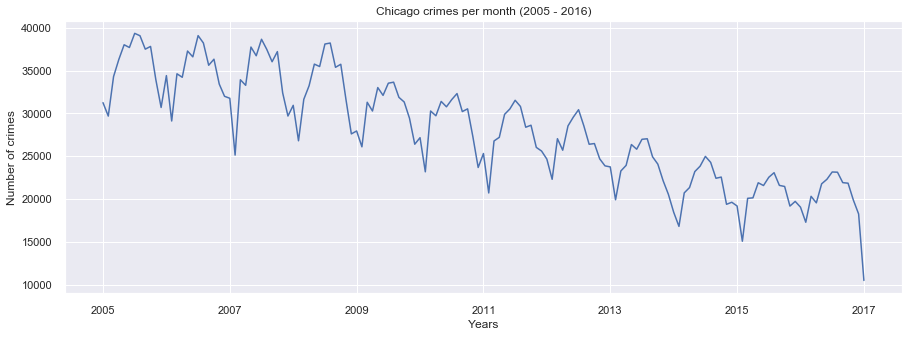

In [204]:
plt.figure(figsize=(15,5))
crimes.resample('M').size().plot(legend=False)
plt.title('Chicago crimes per month (2005 - 2016)')
plt.xlabel('Years')
plt.ylabel('Number of crimes')
plt.show()

## Rolling sum of all crimes

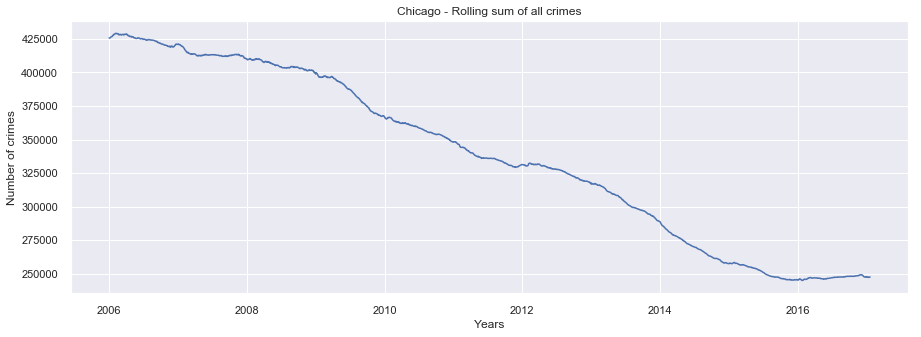

In [205]:
plt.figure(figsize=(15,5))
crimes.resample('D').size().rolling(365).sum().plot()
plt.title('Chicago - Rolling sum of all crimes')
plt.ylabel('Number of crimes')
plt.xlabel('Years')
plt.show()

## Plot different types of crime  (Rolling Sum)

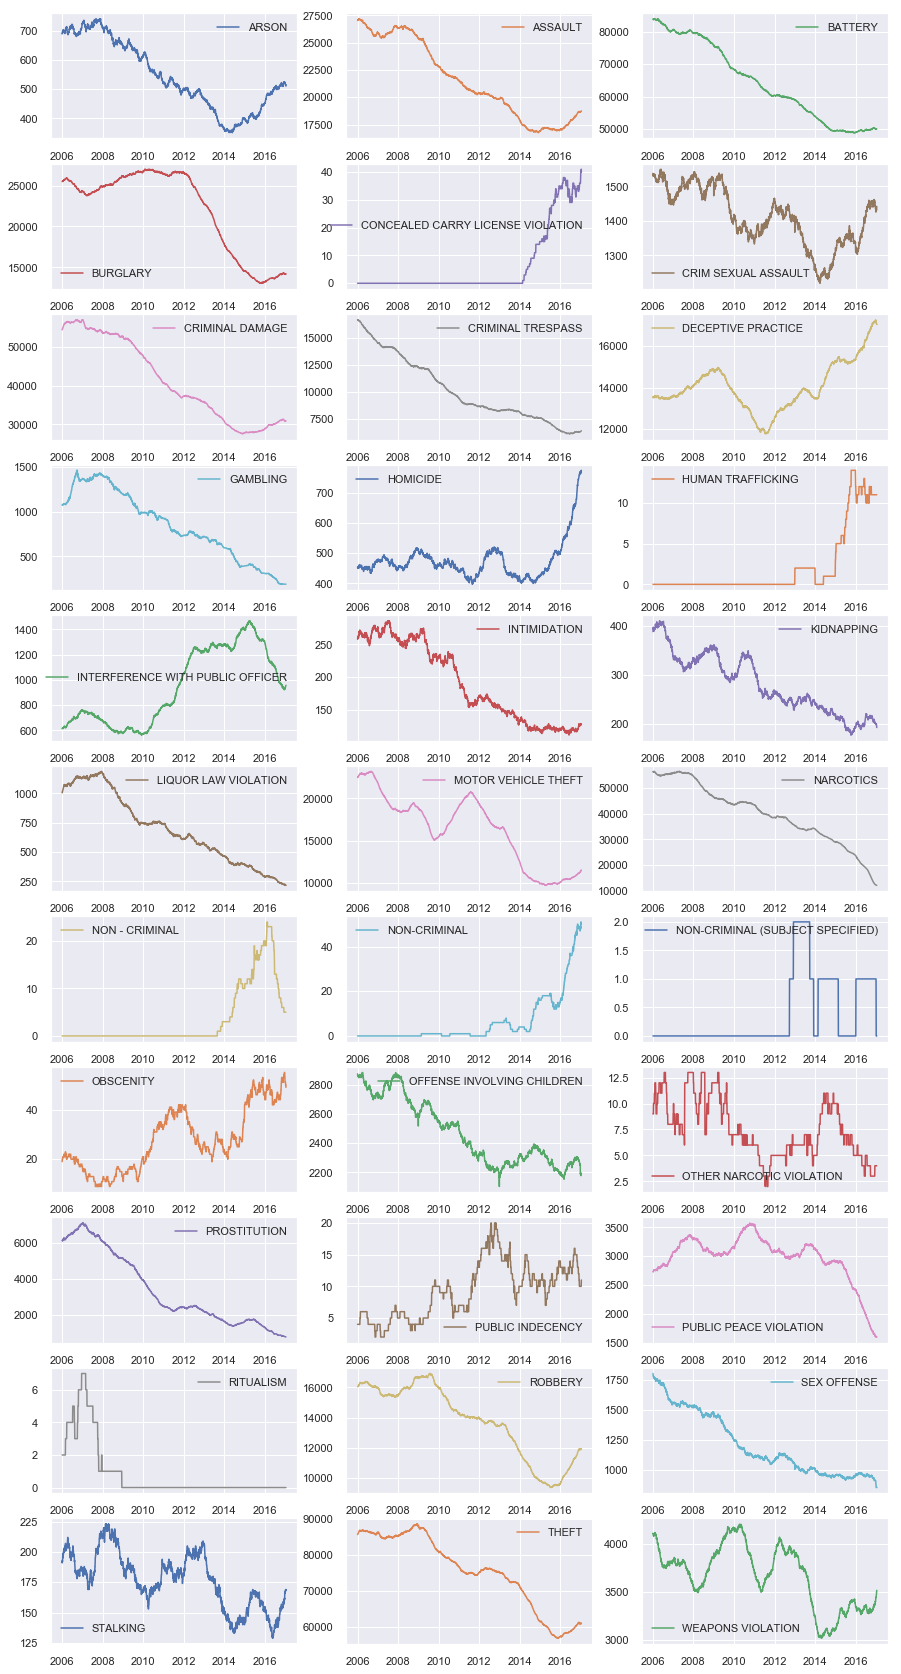

In [206]:
crimes_count_date = crimes.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=crimes.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plo = crimes_count_date.rolling(365).sum().plot(figsize=(15, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

## Number of crimes by day of the week

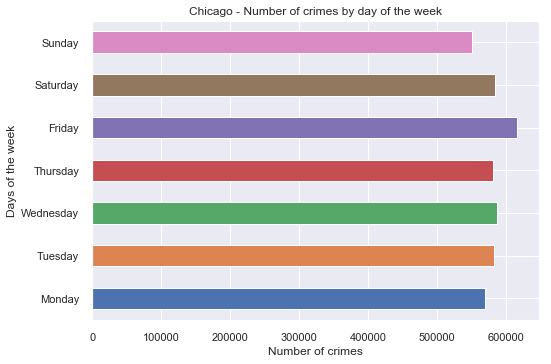

In [207]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
crimes.groupby([crimes.index.dayofweek]).size().plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Chicago - Number of crimes by day of the week')
plt.show()

## Number of crimes by month of the year

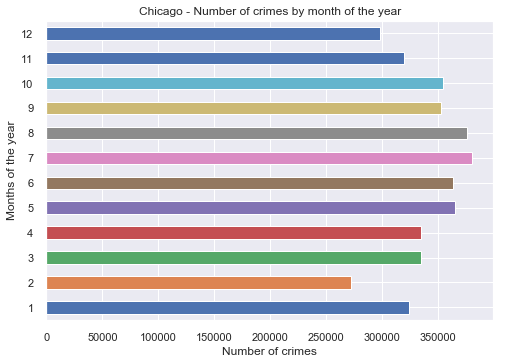

In [208]:
crimes.groupby([crimes.index.month]).size().plot(kind='barh')
plt.ylabel('Months of the year')
plt.xlabel('Number of crimes')
plt.title('Chicago - Number of crimes by month of the year')
plt.show()

## Number of crimes by type

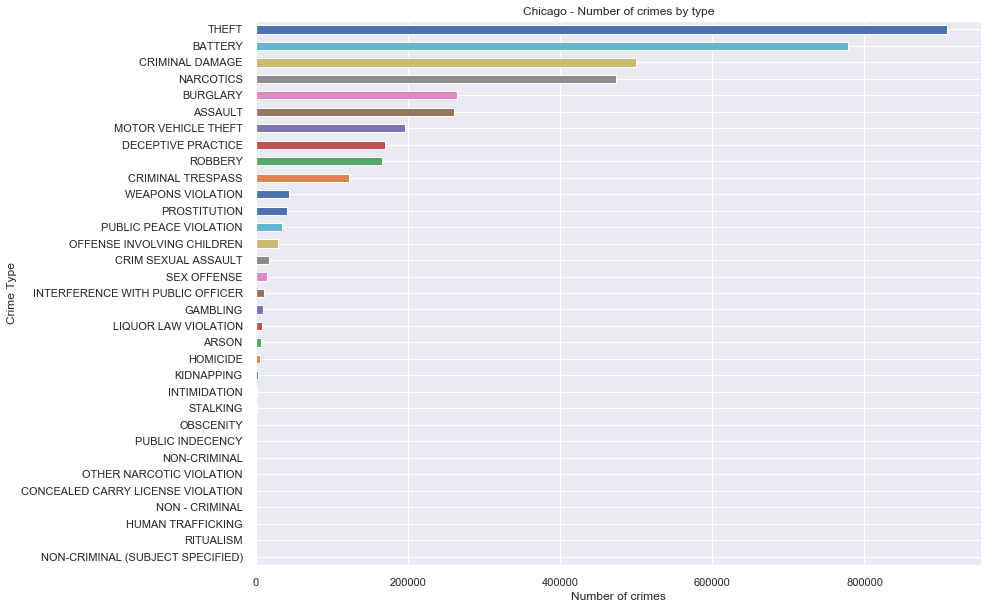

In [209]:
plt.figure(figsize=(13,10))
crimes.groupby([crimes['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Chicago - Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()

## Number of crimes by Location

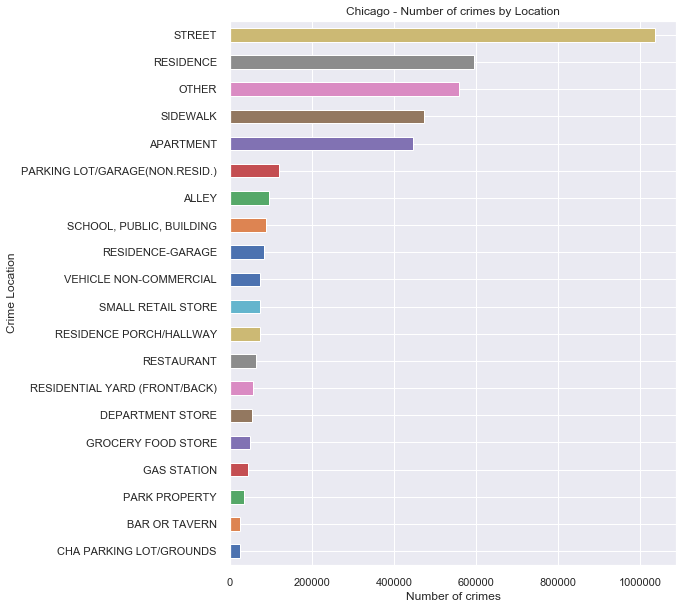

In [210]:
plt.figure(figsize=(8,10))
crimes.groupby([crimes['Location Description']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Chicago - Number of crimes by Location')
plt.ylabel('Crime Location')
plt.xlabel('Number of crimes')
plt.show()

## Number of crimes by Ward
#### https://www.chicago.gov/content/dam/city/depts/doit/general/GIS/Chicago_Maps/Citywide_Maps/Wards.pdf

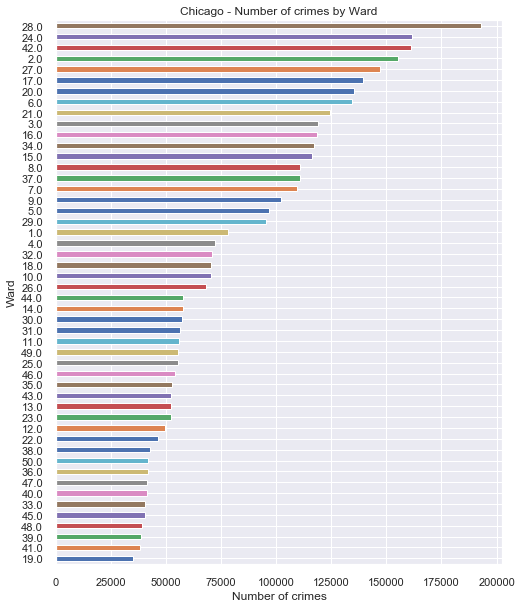

In [211]:
plt.figure(figsize=(8,10))
crimes.groupby([crimes['Ward']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Chicago - Number of crimes by Ward')
plt.ylabel('Ward')
plt.xlabel('Number of crimes')
plt.show()

# Heatmaps - Showing how crime differs depending on the time

## Heatmap - Hour by Location

Text(0.5,1,'Chicago - Hour by Location')

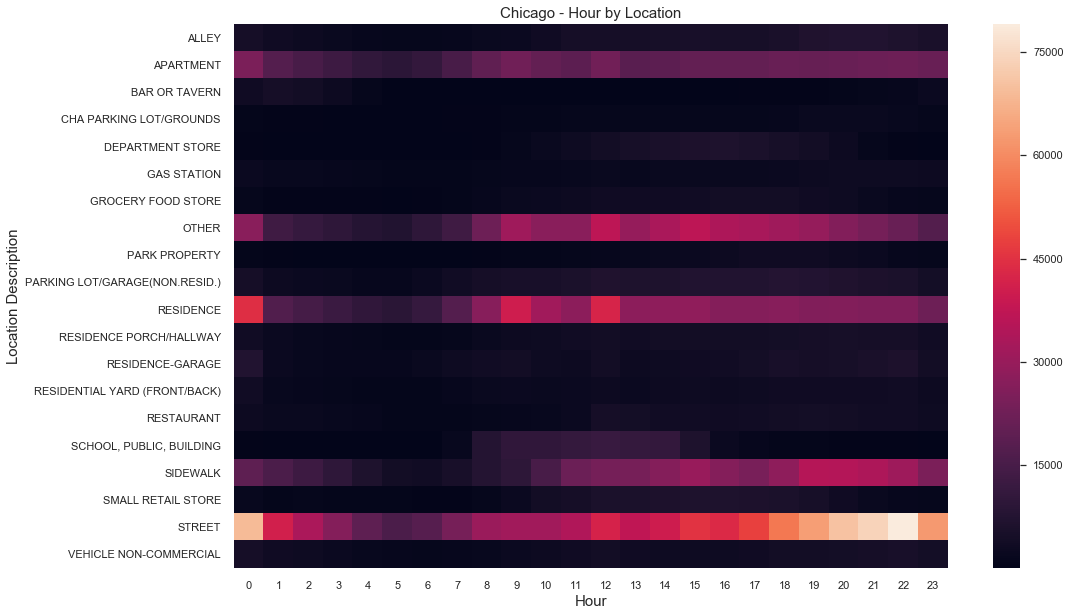

In [212]:
hour_by_location = crimes.pivot_table(values='ID', index='Location Description', columns=crimes.index.hour, aggfunc=np.size).fillna(0)

plt.figure(figsize=(16,10))
ax = sns.heatmap(hour_by_location)
ax.set_xlabel('Hour', fontsize=15)
ax.set_ylabel('Location Description', fontsize=15)
ax.set_title('Chicago - Hour by Location', fontsize=15)

## Heatmap - Hour by Ward

Text(0.5,1,'Chicago - Hour by Ward')

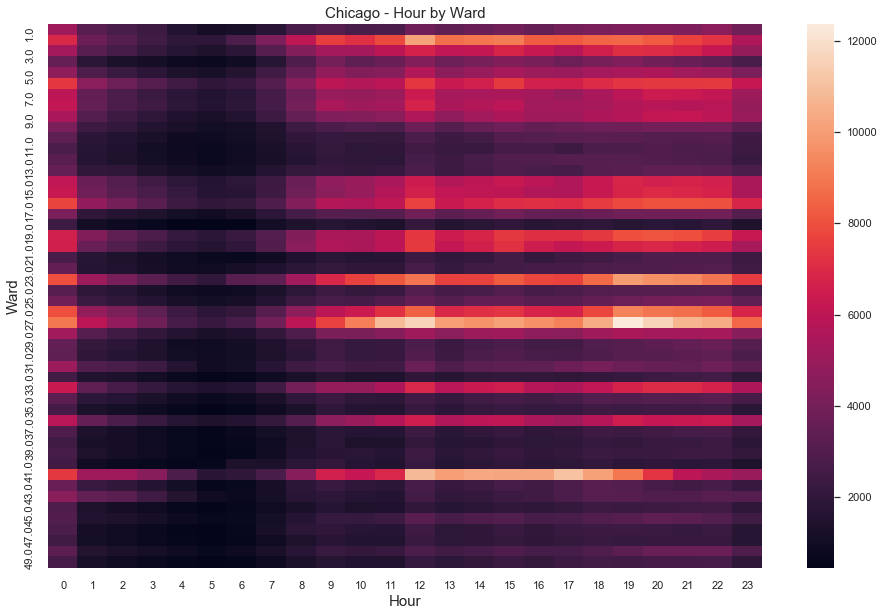

In [213]:
hour_by_location = crimes.pivot_table(values='ID', index='Ward', columns=crimes.index.hour, aggfunc=np.size).fillna(0)

plt.figure(figsize=(16,10))
ax = sns.heatmap(hour_by_location)
ax.set_xlabel('Hour', fontsize=15)
ax.set_ylabel('Ward', fontsize=15)
ax.set_title('Chicago - Hour by Ward', fontsize=15)

## Heatmap - Hour by Crime Type

Text(0.5,1,'Hour by Primary Type')

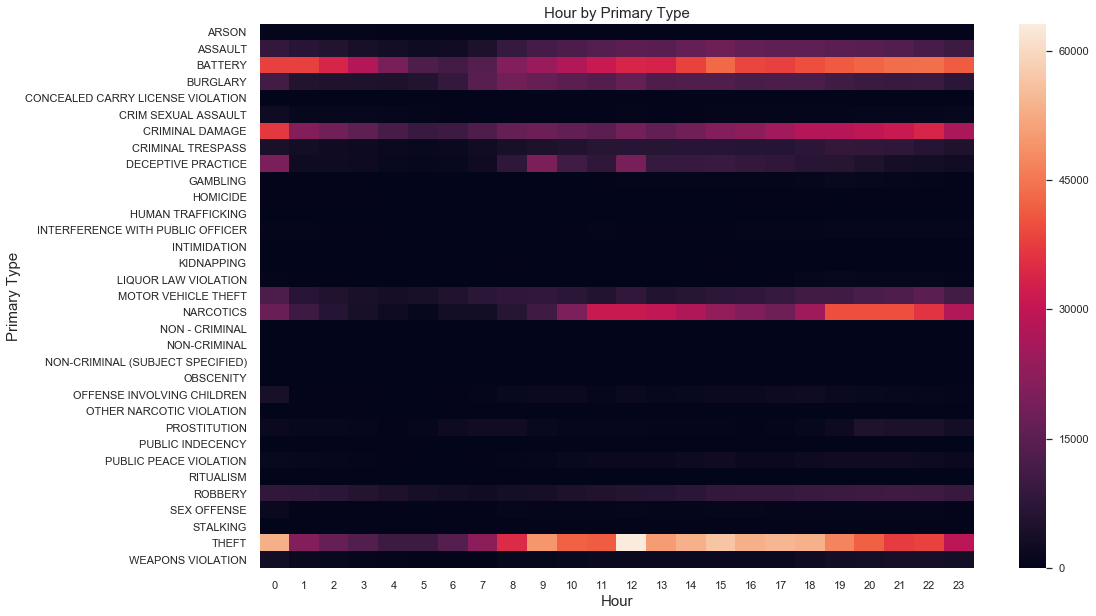

In [214]:
hour_by_type = crimes.pivot_table(values='ID', index='Primary Type', columns=crimes.index.hour, aggfunc=np.size).fillna(0)

plt.figure(figsize=(16,10))
ax = sns.heatmap(hour_by_type)
ax.set_xlabel('Hour', fontsize=15)
ax.set_ylabel('Primary Type', fontsize=15)
ax.set_title('Hour by Primary Type', fontsize=15)

## Heatmap - Hour by Week

Text(0.5,1,'Chicago - Hour by Day of Week')

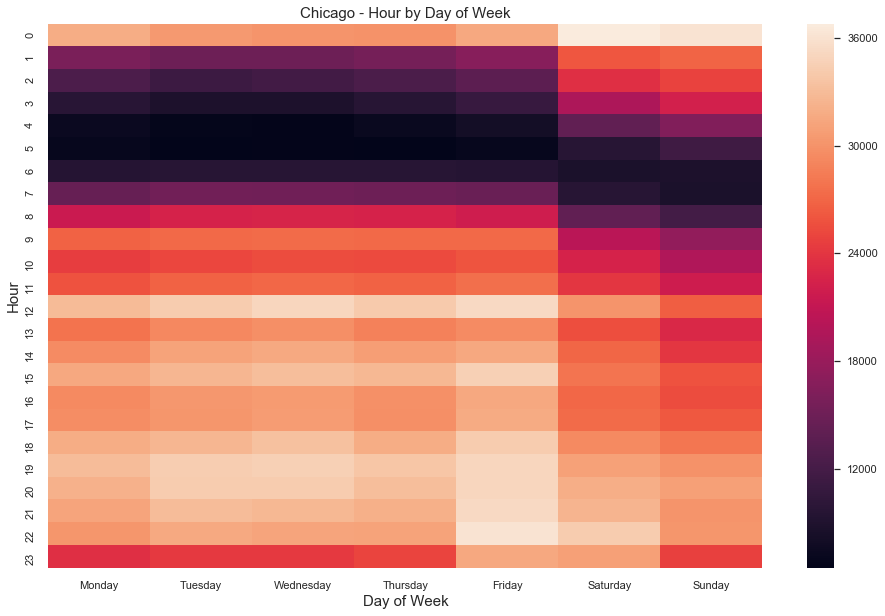

In [215]:
hour_by_week = crimes.pivot_table(values='ID', index=crimes.index.hour, columns=crimes.index.weekday_name, aggfunc=np.size).fillna(0)
hour_by_week = hour_by_week[days]

plt.figure(figsize=(16,10))
ax = sns.heatmap(hour_by_week)
ax.set_xlabel('Day of Week', fontsize=15)
ax.set_ylabel('Hour', fontsize=15)
ax.set_title('Chicago - Hour by Day of Week', fontsize=15)

## Reorder columns according to the the order of days

In [216]:
hour_by_week = hour_by_week[days].T 

## Heatmap - Day of Week by Location

In [217]:
dayofweek_by_location = crimes.pivot_table(values='ID', index='Location Description', columns=crimes.index.weekday_name, aggfunc=np.size).fillna(0)
dayofweek_by_location = dayofweek_by_location[days]

Text(0.5,1,'Day of Week by Location')

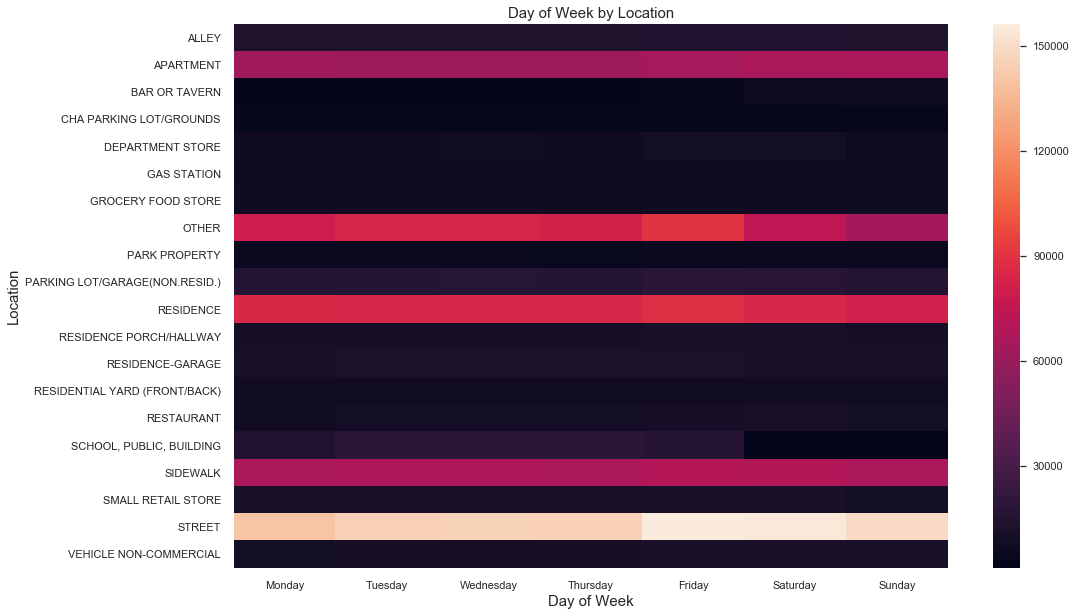

In [218]:
plt.figure(figsize=(16,10))
ax = sns.heatmap(dayofweek_by_location)
ax.set_xlabel('Day of Week', fontsize=15)
ax.set_ylabel('Location', fontsize=15)
ax.set_title('Day of Week by Location', fontsize=15)

## Heatmap - Day of Week by Type

Text(0.5,1,'Day of Week by Type')

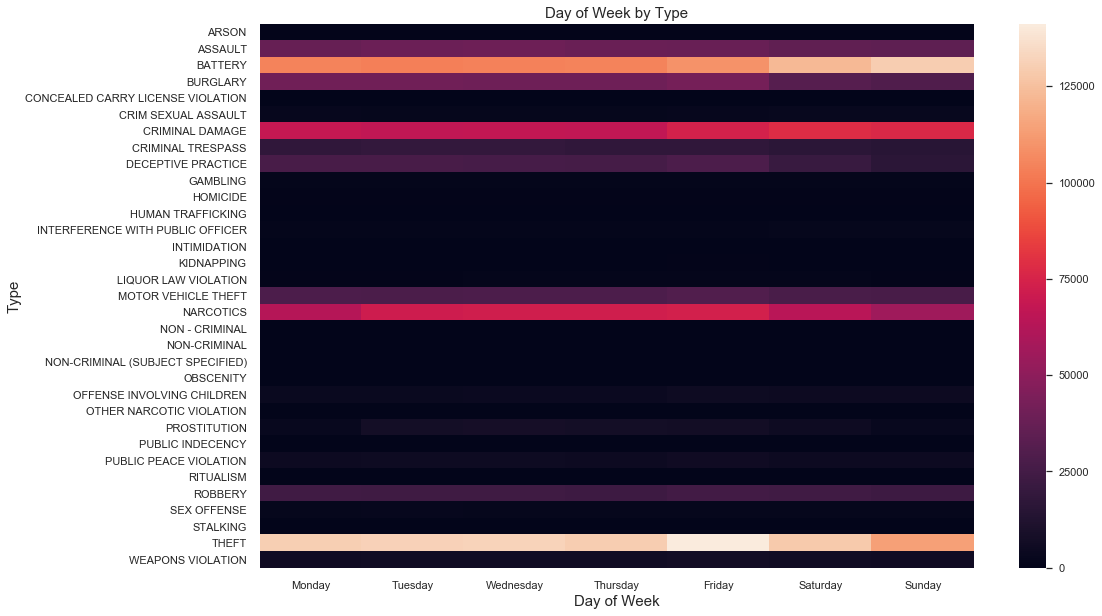

In [219]:
dayofweek_by_type = crimes.pivot_table(values='ID', index='Primary Type', columns=crimes.index.weekday_name, aggfunc = np.size).fillna(0)
dayofweek_by_type=dayofweek_by_type[days]

plt.figure(figsize=(16,10))
ax = sns.heatmap(dayofweek_by_type)
ax.set_xlabel('Day of Week', fontsize=15)
ax.set_ylabel('Type', fontsize=15)
ax.set_title('Day of Week by Type', fontsize=15)

## Heatmap - Location by Type

Text(0.5,1,'Location by Primary Type')

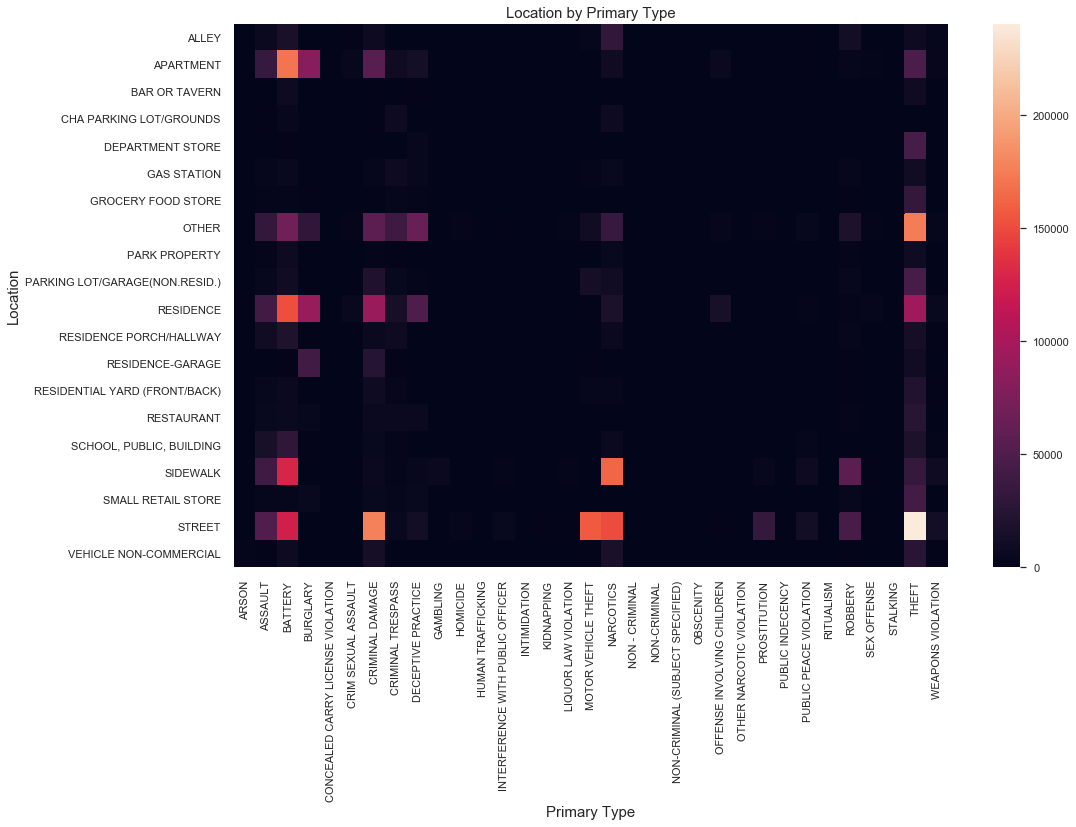

In [220]:
location_by_type  = crimes.pivot_table(values='ID', index='Location Description', columns='Primary Type', aggfunc=np.size).fillna(0)

plt.figure(figsize=(16,10))
ax = sns.heatmap(location_by_type)
ax.set_xlabel('Primary Type', fontsize=15)
ax.set_ylabel('Location', fontsize=15)
ax.set_title('Location by Primary Type', fontsize=15)

# Compare Machine Learning Models in Scikit-learn
# --
## View size of dataframe

In [221]:
print(crimes["Ward"].shape)
print(crimes["month"].shape)
print(crimes["day"].shape)
print(crimes["hour"].shape)
print(crimes["weekday"].shape)
print(crimes["Primary Type"].shape)

(4072356,)
(4072356,)
(4072356,)
(4072356,)
(4072356,)
(4072356,)


## Build a new dataframe called 'crimes_learn'
# Why?

In [222]:
crimes_learn = crimes.loc[:,('month','day','weekday','hour','Primary Type','Ward')]
crimes_learn.head(1)

,month,day,weekday,hour,Primary Type,Ward
Date,,,,,,
2006-02-26 13:40:48,2,26,6,13,NARCOTICS,20.0


## Primary Type Value Count

In [223]:
# primary type
print('Primary Type: ', crimes_learn["Primary Type"].value_counts().size)

Primary Type:  33


In [224]:
crimes_learn.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4072356 entries, 2006-02-26 13:40:48 to 2016-05-03 21:07:00
Data columns (total 6 columns):
month           int64
day             int64
weekday         int64
hour            int64
Primary Type    category
Ward            float64
dtypes: category(1), float64(1), int64(4)
memory usage: 190.3 MB


## Find just the columns that have NaN values

In [225]:
crimes_learn.isnull().any()

month           False
day             False
weekday         False
hour            False
Primary Type    False
Ward             True
dtype: bool

## Drop null values

In [226]:
print('Shape before: ',crimes_learn.shape)
print()
print('Rows with NaN entries before')
print('Ward: ',crimes_learn['Ward'].isnull().sum())
crimes_learn.dropna(inplace = True)
print()
print('Rows with NaN entries after')
print('Ward: ',crimes_learn['Ward'].isnull().sum())
print()
print('Shape after: ',crimes_learn.shape)

Shape before:  (4072356, 6)

Rows with NaN entries before
Ward:  61

Rows with NaN entries after
Ward:  0

Shape after:  (4072295, 6)


In [227]:
crimes_learn.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4072295 entries, 2006-02-26 13:40:48 to 2016-05-03 21:07:00
Data columns (total 6 columns):
month           int64
day             int64
weekday         int64
hour            int64
Primary Type    category
Ward            float64
dtypes: category(1), float64(1), int64(4)
memory usage: 190.3 MB


In [228]:
crimes_learn.head(2)

,month,day,weekday,hour,Primary Type,Ward
Date,,,,,,
2006-02-26 13:40:48,2,26,6,13,NARCOTICS,20.0
2006-01-08 23:16:00,1,8,6,23,ASSAULT,5.0


#### Initially all crimes were analysed. Now we will only consider certain relevant crimes to see if prediction accuracy would increase. This is because initially prediction accuracy was quite low. 
#### Some crimes may be too difficult to predict as there are not many of them in the records or maybe they can be considered not worth predicting, as they are not a crime a police officer on the beat is looking out for e.g. Fraud
#### This will also be what a crime unit might do, i.e. just trying to predict crimes of a certain type or the crimes that they are responsible for policing.
#### So several crimes will now be dropped, e.g. Ritualism
#### Crimes with high volume and that have a high chance of being prevented by a visible police officer have been kept
#### Serialize crime type to make it numerical for our machine learning classifier

## Serialize Primary Type (Crime type)
#### 10 crimes kept

In [229]:
import xlrd
############################
from pathlib import Path
############################

data_folder = Path("chicago-data/")

serialized_primary_type_dict = {}
wb = xlrd.open_workbook(data_folder / 'primary_type_mapping.xlsx')
sh = wb.sheet_by_index(0)   
for i in range(33):
    cell_value_primary_type = sh.cell(i,0).value
    cell_value_serialized_primary_type = sh.cell(i,1).value
    serialized_primary_type_dict[cell_value_primary_type] = cell_value_serialized_primary_type

In [230]:
#create new serialized column for Primary Type
crimes_learn['New Primary Type'] = crimes_learn['Primary Type'].map(serialized_primary_type_dict)

## Value Count - Type of crime 

In [231]:
# Text_General_Code
print('Unique values of New Primary Type: ', crimes_learn["New Primary Type"].value_counts().size)
print()

# Sort values and count
crimes_learn.groupby('New Primary Type').size().sort_values()

Unique values of New Primary Type:  11



New Primary Type
24.0    122987
25.0    165715
26.0    170229
27.0    196801
99.0    232425
28.0    260864
29.0    264109
30.0    473788
31.0    499408
32.0    778161
33.0    907808
dtype: int64

In [232]:
crimes_learn.head(2)

,month,day,weekday,hour,Primary Type,Ward,New Primary Type
Date,,,,,,,
2006-02-26 13:40:48,2,26,6,13,NARCOTICS,20.0,30.0
2006-01-08 23:16:00,1,8,6,23,ASSAULT,5.0,28.0


## Reindex dataframe

In [233]:
#reindex
crimes_learn.index = range(len(crimes_learn))

## Reorganize columns

In [234]:
#reorganize columns
crimes_learn = crimes_learn[['New Primary Type', 'month', 'day','weekday', 'hour','Ward']]
crimes_learn.head(2)

,New Primary Type,month,day,weekday,hour,Ward
0,30.0,2,26,6,13,20.0
1,28.0,1,8,6,23,5.0


## Drop rows where 'New Primary Type' = 99.0
#### This will keep only the crimes we wish to concentrate on or predict location

In [235]:
print('Dataset Shape before drop : ', crimes_learn.shape)
crimes_learn = crimes_learn[crimes_learn['New Primary Type'] != 99.0]
print('Dataset Shape after drop: ', crimes_learn.shape)

Dataset Shape before drop :  (4072295, 6)
Dataset Shape after drop:  (3839870, 6)


## Value Count - Type of crime 

In [236]:
# Text_General_Code
print('Unique values of New Primary Type: ', crimes_learn["New Primary Type"].value_counts().size)
print()

# Sort values and count
crimes_learn.groupby('New Primary Type').size().sort_values()

Unique values of New Primary Type:  10



New Primary Type
24.0    122987
25.0    165715
26.0    170229
27.0    196801
28.0    260864
29.0    264109
30.0    473788
31.0    499408
32.0    778161
33.0    907808
dtype: int64

## Randomly Sample Rows to make dataset smaller

In [237]:
crimes_learn = crimes_learn.sample(n=500000)
crimes_learn.shape

(500000, 6)

## Are there null values?

In [238]:
# are there any null values?
print('Are there any columns with NaN entries?')
crimes_learn.isnull().any()

Are there any columns with NaN entries?


New Primary Type    False
month               False
day                 False
weekday             False
hour                False
Ward                False
dtype: bool

## Pair plot

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Elitebook 820\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Elitebook 820\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Elitebook 820\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

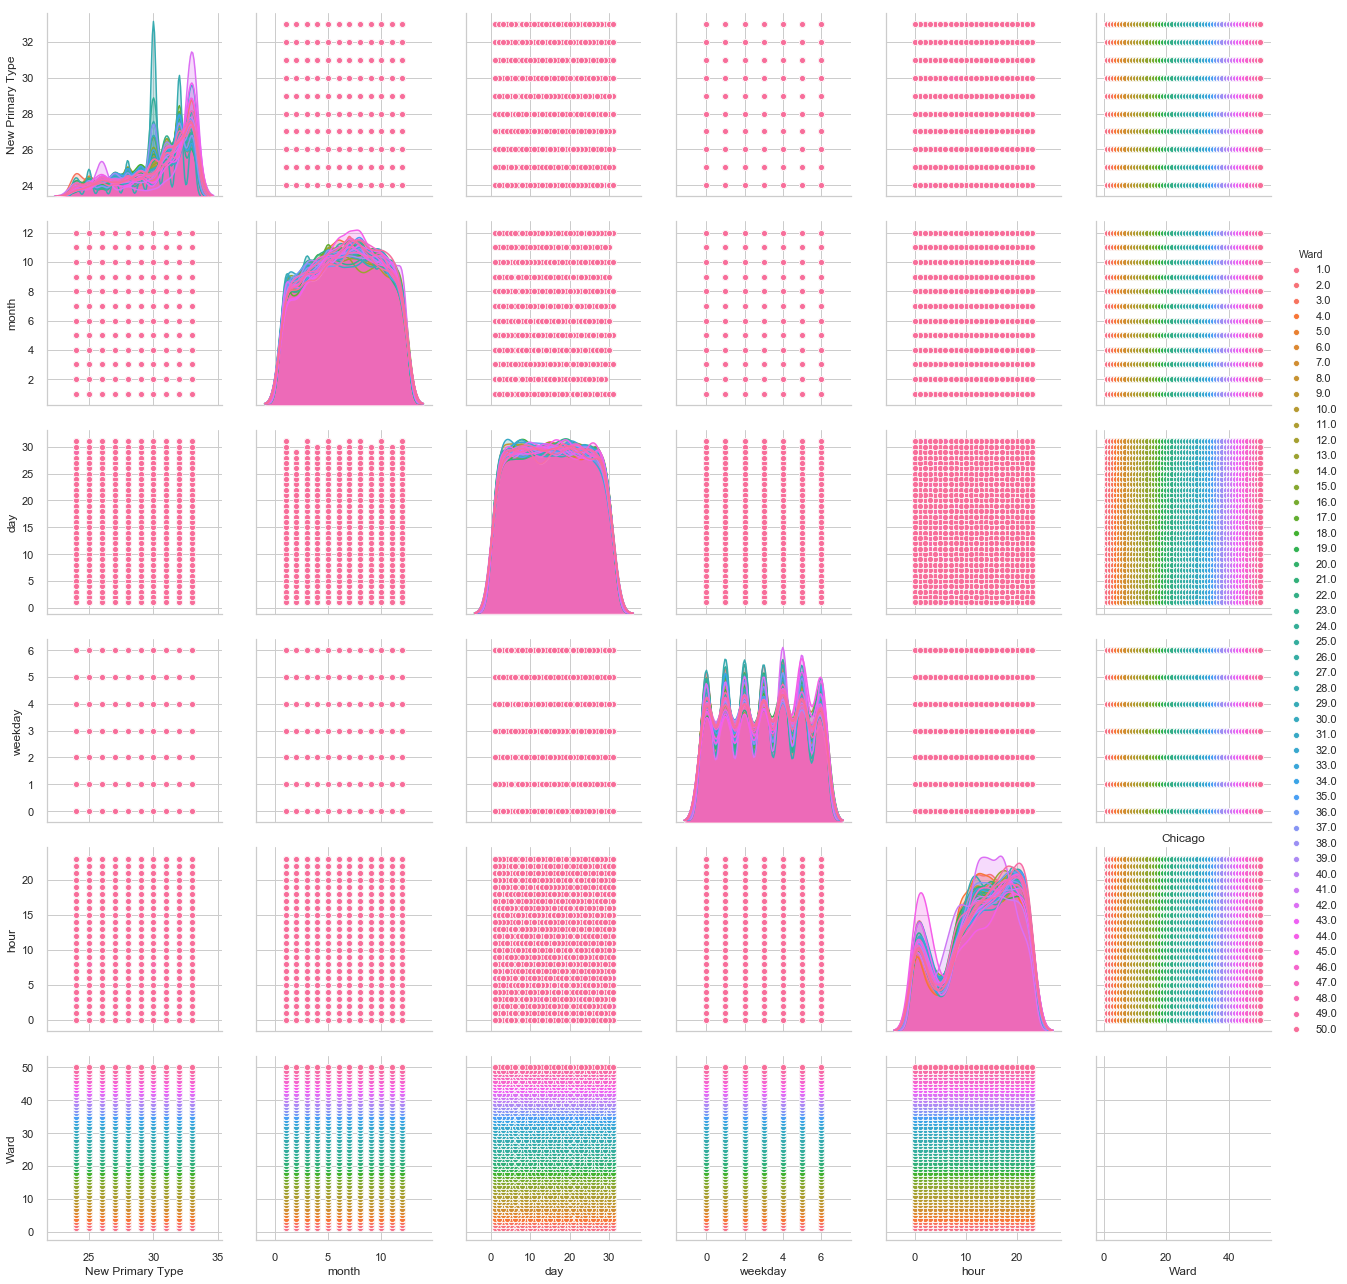

In [239]:
#plt.close()
sns.set_style('whitegrid')
sns.pairplot(crimes_learn, hue = 'Ward', height = 3)
plt.title('Chicago')
plt.show()

## Univariate analysis

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


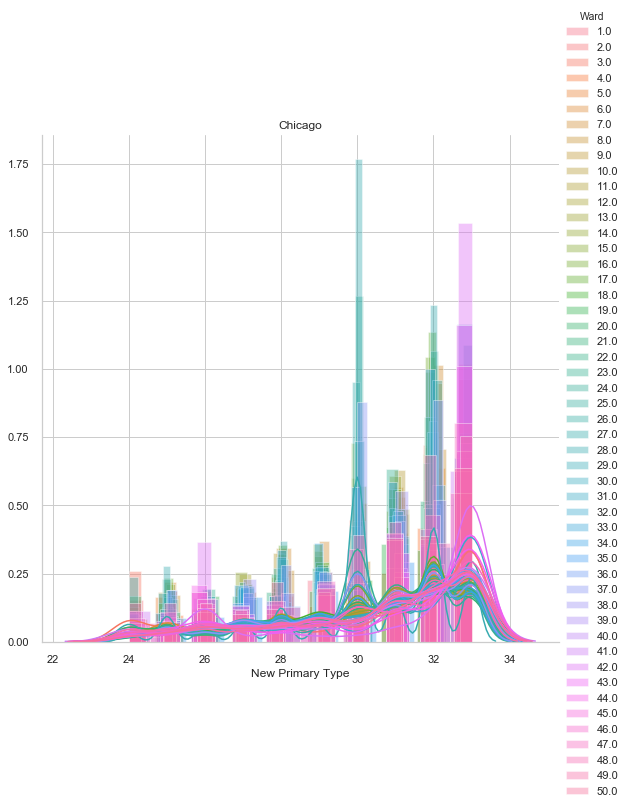

In [240]:
sns.FacetGrid(crimes_learn, hue='Ward',height=8).map(sns.distplot, 'New Primary Type').add_legend()
plt.title('Chicago')
plt.show()

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


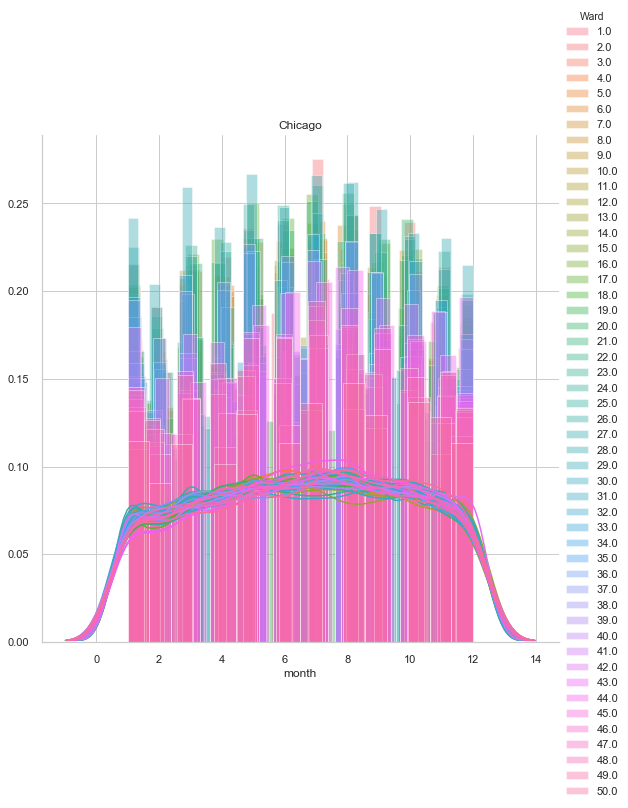

In [241]:
sns.FacetGrid(crimes_learn, hue='Ward',height=8).map(sns.distplot, 'month').add_legend()
plt.title('Chicago')
plt.show()

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


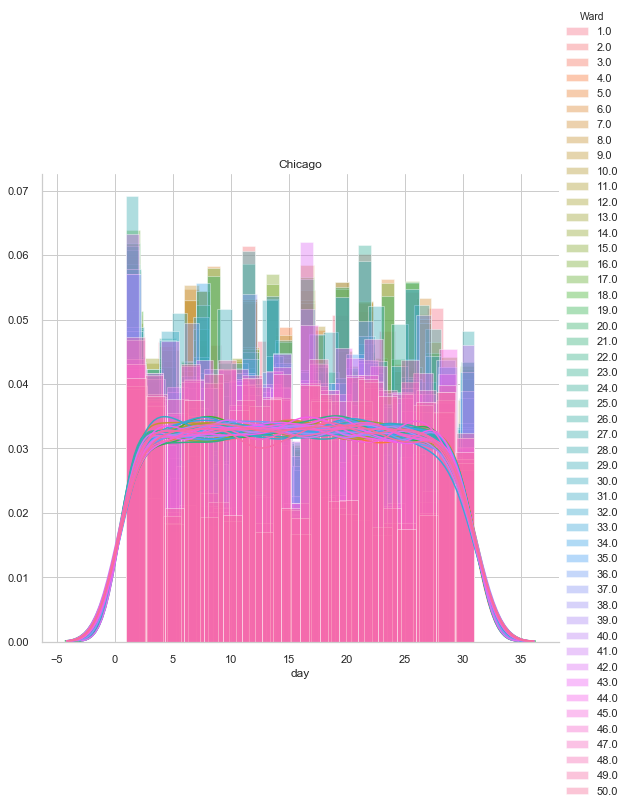

In [242]:
sns.FacetGrid(crimes_learn, hue='Ward',height=8).map(sns.distplot, 'day').add_legend()
plt.subplots_adjust(top=0.9)
plt.title('Chicago')
plt.show()

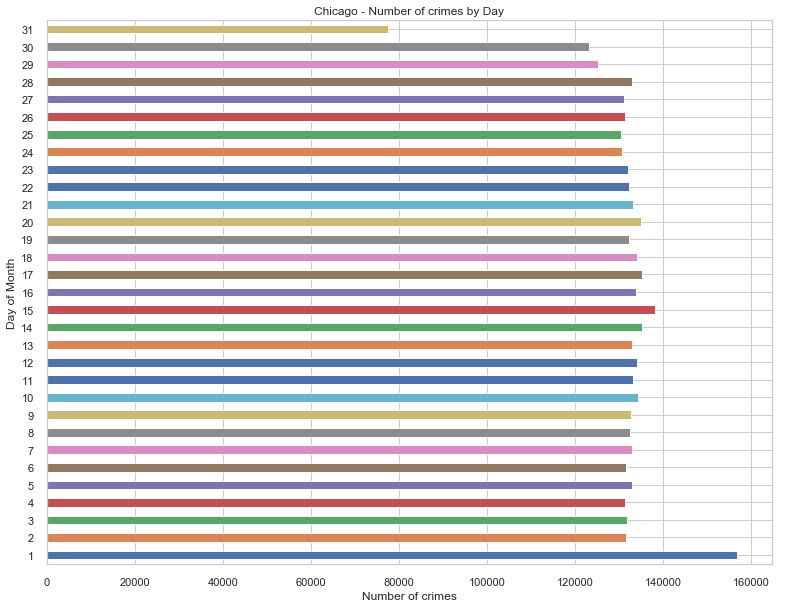

In [243]:
# testing Number of Crimes by Day
plt.figure(figsize=(13,10))
crimes.groupby([crimes['day']]).size().plot(kind='barh')
plt.title('Chicago - Number of crimes by Day')
plt.ylabel('Day of Month')
plt.xlabel('Number of crimes')
plt.show()

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


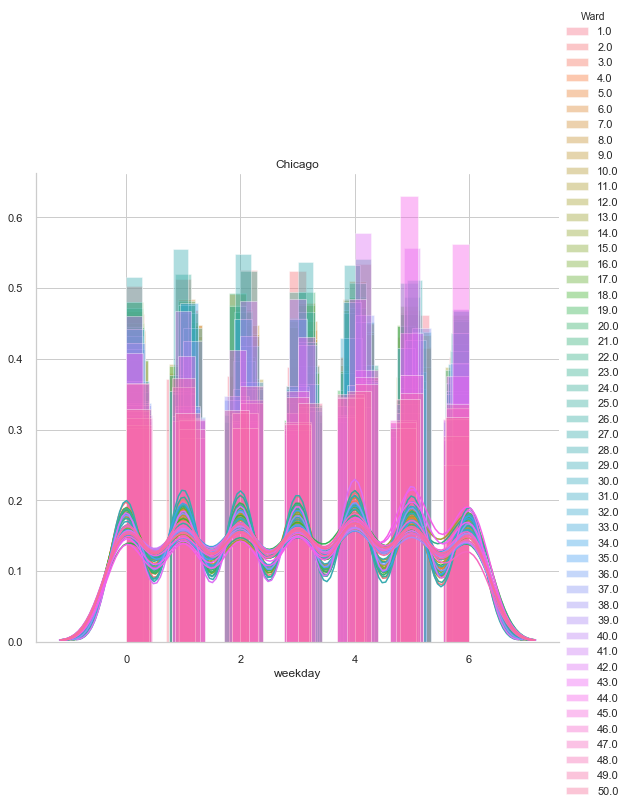

In [244]:
sns.FacetGrid(crimes_learn, hue='Ward',height=8).map(sns.distplot, 'weekday').add_legend()
plt.subplots_adjust(top=0.9)
plt.title('Chicago')
plt.show()

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


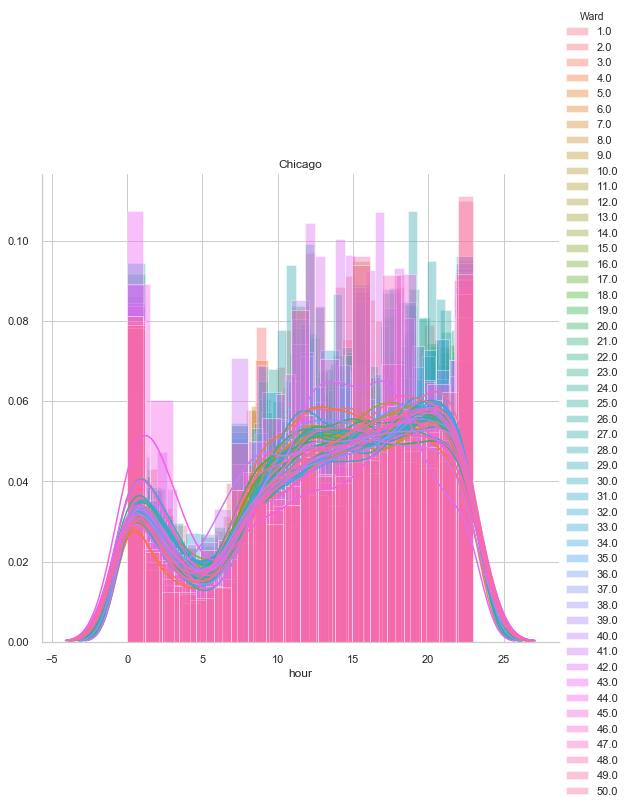

In [245]:
sns.FacetGrid(crimes_learn, hue='Ward',height=8).map(sns.distplot, 'hour').add_legend()
plt.subplots_adjust(top=0.9)
plt.title('Chicago')
plt.show()

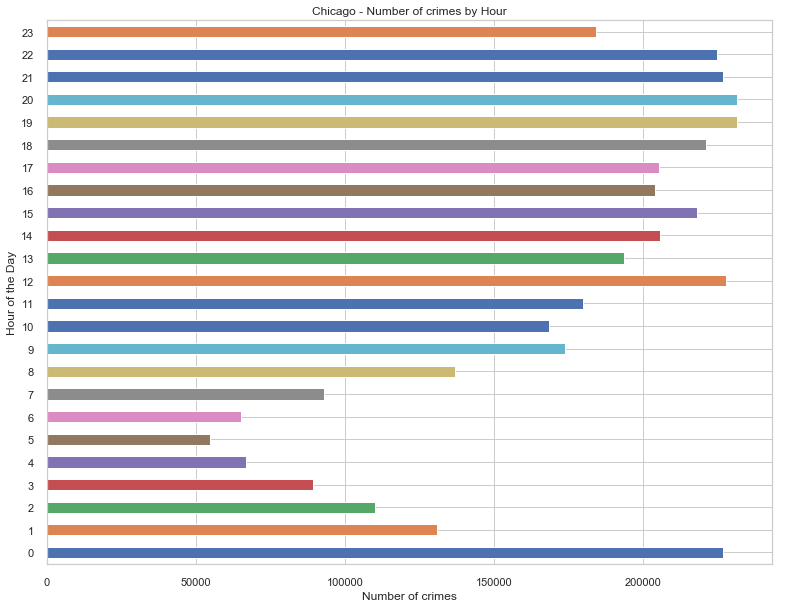

In [246]:
# Number of Crimes by Hour
plt.figure(figsize=(13,10))
crimes.groupby([crimes['hour']]).size().plot(kind='barh')
plt.title('Chicago - Number of crimes by Hour')
plt.ylabel('Hour of the Day')
plt.xlabel('Number of crimes')
plt.show()

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


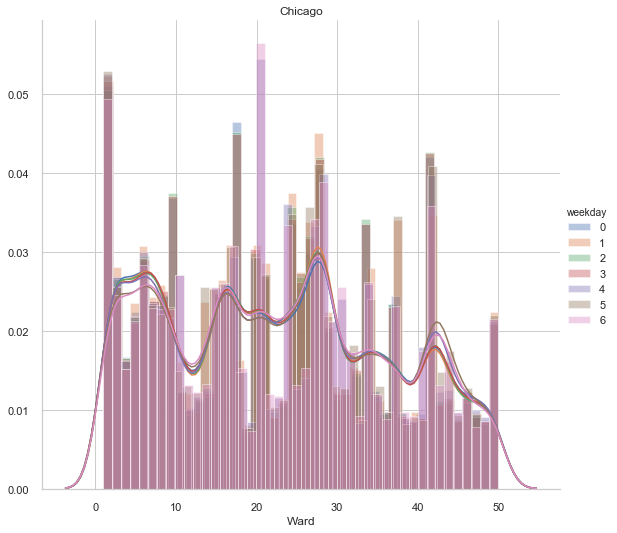

In [247]:
sns.FacetGrid(crimes_learn, hue='weekday',height=8).map(sns.distplot, 'Ward').add_legend()
plt.subplots_adjust(top=0.9)
plt.title('Chicago')
plt.show()

## Note, Drop 'day' column,  is not carried out on this Notebook
#### Why did we remove 'day' from the dataframe?
#### Chicago - include DAY and see did that change accuracy. Does it affect ML models? Not significantly
#### CRIME TYPE + MONTH + WEEKDAY + HOUR => LOCATION
#### We will focus on the type of crime and when the crime happens to predict its location.


In [248]:
crimes_learn = crimes_learn[['New Primary Type', 'month', 'day','weekday', 'hour','Ward']]
crimes_learn.head(2)

,New Primary Type,month,day,weekday,hour,Ward
2415700,30.0,3,8,1,7,17.0
3865374,32.0,3,6,6,16,4.0


In [251]:
#Drop the day column to see change in prediction accuracy
crimes_learn = crimes_learn[['New Primary Type', 'month','weekday', 'hour','Ward']]
crimes_learn.head(2)

,New Primary Type,month,weekday,hour,Ward
2415700,30.0,3,1,7,17.0
3865374,32.0,3,6,16,4.0


## Value Counts - Note large number of Wards

In [252]:
# Value Counts 

print('New Primary Type: ', crimes_learn["New Primary Type"].value_counts().size)
print()

print('month: ', crimes_learn["month"].value_counts().size)
print()

# print('day: ', crimes_learn["day"].value_counts().size)
# print()

print('weekday: ', crimes_learn["weekday"].value_counts().size)
print()

print('hour: ', crimes_learn["hour"].value_counts().size)
print()

print('Ward: ', crimes_learn["Ward"].value_counts().size)

New Primary Type:  10

month:  12

weekday:  7

hour:  24

Ward:  50


In [253]:
crimes_learn.groupby('Ward').size().sort_values()

Ward
19.0     4319
41.0     4805
48.0     4813
39.0     4854
33.0     4856
45.0     5053
47.0     5159
40.0     5200
50.0     5218
38.0     5263
36.0     5276
22.0     5543
12.0     5959
23.0     6223
13.0     6550
46.0     6603
43.0     6663
35.0     6748
30.0     6801
25.0     6804
49.0     6811
11.0     6856
14.0     6938
31.0     6950
44.0     7247
26.0     8246
10.0     8484
18.0     8685
32.0     8948
4.0      8996
1.0      9762
29.0    11787
5.0     12237
9.0     12513
7.0     13152
37.0    13345
8.0     13436
15.0    14037
34.0    14388
16.0    14394
3.0     14726
21.0    15125
6.0     16460
20.0    16582
17.0    16842
27.0    18418
2.0     19037
24.0    19591
42.0    20187
28.0    23110
dtype: int64

# Modeling with Scikit-learn

In [254]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import pickle

## Inspired by: 
#### https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

In [255]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [256]:
# create a Validation Dataset
X = crimes_learn.drop(['Ward'], axis=1)
Y = crimes_learn['Ward']
print(X.head(2))
print("X.shape ", X.shape,'\n')
print(Y.head(2))
print("Y.shape ", Y.shape)

# Split-out validation dataset
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

         New Primary Type  month  weekday  hour
2415700              30.0      3        1     7
3865374              32.0      3        6    16
X.shape  (500000, 4) 

2415700    17.0
3865374     4.0
Name: Ward, dtype: float64
Y.shape  (500000,)


In [257]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

## Let’s evaluate several algorithms:
#### Svm classifier took too long so stopped running it

In [258]:
# Build Models
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Elitebook 820\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Elitebook 820\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Elitebook 820\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Elitebook 820\Anaconda3\lib\site-packages\sklearn\linear_model\lo

LR: 0.056633 (0.001187)
LDA: 0.056270 (0.001265)
KNN: 0.034350 (0.001125)
CART: 0.050245 (0.001075)
NB: 0.060857 (0.001895)


## Compare Algorithms

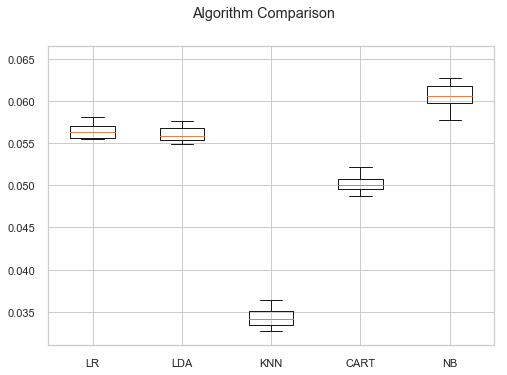

In [259]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Make Predictions

In [260]:
# Make predictions on validation dataset
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_validation)

print("LogisticRegression")
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Elitebook 820\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression
0.05674
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00      1928
         2.0       0.00      0.00      0.00      3801
         3.0       0.00      0.00      0.00      3037
         4.0       0.00      0.00      0.00      1753
         5.0       0.00      0.00      0.00      2454
         6.0       0.00      0.00      0.00      3244
         7.0       0.00      0.00      0.00      2663
         8.0       0.00      0.00      0.00      2753
         9.0       0.00      0.00      0.00      2470
        10.0       0.00      0.00      0.00      1754
        11.0       0.00      0.00      0.00      1388
        12.0       0.00      0.00      0.00      1237
        13.0       0.00      0.00      0.00      1318
        14.0       0.00      0.00      0.00      1313
        15.0       0.00      0.00      0.0

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [261]:
# Make predictions on validation dataset
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_validation)

print("LinearDiscriminantAnalysis")
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

LinearDiscriminantAnalysis
0.05659
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00      1928
         2.0       0.00      0.00      0.00      3801
         3.0       0.00      0.00      0.00      3037
         4.0       0.00      0.00      0.00      1753
         5.0       0.00      0.00      0.00      2454
         6.0       0.00      0.00      0.00      3244
         7.0       0.00      0.00      0.00      2663
         8.0       0.00      0.00      0.00      2753
         9.0       0.00      0.00      0.00      2470
        10.0       0.00      0.00      0.00      1754
        11.0       0.00      0.00      0.00      1388
        12.0       0.00      0.00      0.00      1237
        13.0       0.00      0.00      0.00      1318
        14.0       0.00      0.00      0.00      1313
        15.0       0.00      0.00 

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [262]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)

print("KNeighborsClassifier")
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

KNeighborsClassifier
0.03479
[[189 313 158 ...   1   3   2]
 [355 578 374 ...   2   9   3]
 [217 407 319 ...   0   6   2]
 ...
 [ 82 117  89 ...   0   1   1]
 [ 98 202 120 ...   2   3   1]
 [ 91 150  87 ...   2   2   1]]
              precision    recall  f1-score   support

         1.0       0.02      0.10      0.04      1928
         2.0       0.04      0.15      0.07      3801
         3.0       0.04      0.11      0.05      3037
         4.0       0.02      0.06      0.03      1753
         5.0       0.03      0.07      0.04      2454
         6.0       0.04      0.08      0.05      3244
         7.0       0.03      0.06      0.04      2663
         8.0       0.03      0.05      0.04      2753
         9.0       0.03      0.04      0.03      2470
        10.0       0.02      0.02      0.02      1754
        11.0       0.02      0.03      0.02      1388
        12.0       0.02      0.03      0.02      1237
        13.0       0.02      0.02      0.02      1318
        14.0       0.0

In [263]:
# Make predictions on validation dataset
cart = DecisionTreeClassifier()
cart.fit(X_train, Y_train)
predictions = cart.predict(X_validation)

print("DecisionTreeClassifier")
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

DecisionTreeClassifier
0.05058
[[ 84 216  73 ...   3   0   6]
 [143 441 212 ...   3   4   4]
 [ 85 291 193 ...   3   5   0]
 ...
 [ 38 119  50 ...   0   2   0]
 [ 46 111  77 ...   0   2   1]
 [ 43 108  48 ...   1   3   4]]
              precision    recall  f1-score   support

         1.0       0.02      0.04      0.03      1928
         2.0       0.04      0.12      0.06      3801
         3.0       0.04      0.06      0.05      3037
         4.0       0.02      0.02      0.02      1753
         5.0       0.03      0.04      0.03      2454
         6.0       0.04      0.06      0.05      3244
         7.0       0.03      0.04      0.04      2663
         8.0       0.03      0.04      0.03      2753
         9.0       0.03      0.03      0.03      2470
        10.0       0.03      0.02      0.02      1754
        11.0       0.02      0.01      0.02      1388
        12.0       0.02      0.01      0.01      1237
        13.0       0.02      0.01      0.01      1318
        14.0       0

In [264]:
# Make predictions on validation dataset
nb = GaussianNB()
nb.fit(X_train, Y_train)
predictions = nb.predict(X_validation)

print("GaussianNB")
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

GaussianNB
0.06168
[[  0  32 116 ...   0   0   0]
 [  0 121 385 ...   0   0   0]
 [  0  37 376 ...   0   0   0]
 ...
 [  0  19  70 ...   0   0   0]
 [  0  24 101 ...   0   0   0]
 [  0  18  53 ...   0   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00      1928
         2.0       0.06      0.03      0.04      3801
         3.0       0.05      0.12      0.07      3037
         4.0       0.00      0.00      0.00      1753
         5.0       0.00      0.00      0.00      2454
         6.0       0.04      0.02      0.02      3244
         7.0       0.00      0.00      0.00      2663
         8.0       0.00      0.00      0.00      2753
         9.0       0.00      0.00      0.00      2470
        10.0       0.00      0.00      0.00      1754
        11.0       0.00      0.00      0.00      1388
        12.0       0.00      0.00      0.00      1237
        13.0       0.00      0.00      0.00      1318
        14.0       0.00      0.0

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [265]:
print(predictions[0:10])
print(Y_validation[0:10])

[42. 42. 42. 28.  3. 42. 28. 28. 28.  3.]
1112615     5.0
2801546    42.0
1868615     6.0
2332732     5.0
2339794    23.0
2907820    34.0
2142121    37.0
1335188    37.0
4055647     6.0
1358457    37.0
Name: Ward, dtype: float64


## Split the dataset into a training set and a testing set

In [266]:
# X = crimes_learn.drop(['Ward'], axis=1)
# y = crimes_learn['Ward']
# print(X.head(2))
# print(X.shape,'\n')
# print(y.head(2))
# print(y.shape)

In [267]:
# # Split the dataset into a training set and a testing set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)
# print(X_train.shape)
# print(X_test.shape)
# print()
# print(y_train.shape)
# print(y_test.shape)

## Logistic Regression

In [268]:
# # train the model on the training set
# logreg = LogisticRegression()
# logreg.fit(X_train, y_train)

## Pickle

In [269]:
# # save the model to disk (pickle)
# filename = 'finalized_LR_model.sav'
# pickle.dump(logreg, open(filename, 'wb'))

## Accuracy score

In [270]:
# # make predictions on the training set
# y_pred = logreg.predict(X_test)

# # compare actual response values (y_test) with predicted response values (y_pred)
# print(metrics.accuracy_score(y_test, y_pred))

## K Nearest Neighbors - Optimize k value

In [271]:
# k_range = list(range(1,26))
# scores = []
# for k in k_range:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_train, y_train)
#     y_pred = knn.predict(X_test)
#     scores.append(metrics.accuracy_score(y_test, y_pred))

## Plot the relationship between k and testing accuracy

In [272]:
# plt.plot(k_range, scores)
# plt.xlabel('Value of k for KNN')
# plt.ylabel('Accuracy Score')
# plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
# plt.show()

# Choosing KNN to Model Ward Prediction with k = ?????
### After seeing that a value of k = 12 is a pretty good number of neighbors for this model, I used it to fit the model for the entire dataset instead of just the training set.

In [273]:
# # instantiate the model with the best known parameters
# knn = KNeighborsClassifier(n_neighbors=12)

# # train the model with X and y (not X_train and y_train)
# knn.fit(X, y)

# #PICKLE
# # save the model to disk (pickle)
# filename = 'finalized_KNN_model.sav'
# pickle.dump(knn, open(filename, 'wb'))

## Make prediction on out-of-sample data

In [274]:
# # make a prediction for an example of an out-of-sample observation
# # predict Ward from knn.predict([[New Primary Type,  month  weekday  hour]])
# knn.predict([[31.0,3,6,12]])

In [275]:
# knn.predict([[28.0,2,6,23]])